# Taek Soo Nam

## CS344 Final Project (Kmeans Clustering)

Continuing from the project, I have started to implement some kmeans algorithms. As mentioned previously, the key columns will be COGSPercent and Deletion Percent. COGSPercent shows the percentage of the cost that Service Express took to repair broken harwares of its customers. DeletionPercent shows the percentage compared to the revenue of how many customers has ended the contracts on different number of hardware devices.

The purpose of this project is to see which customers have high COGSPercent or high DeletionPercent. With the results, we can predict which customers are likely to leave or have high Cost of Goods for repairing devices. Essentially, Service Express likes customers that have low COGSPercent and low DeletionPercent.

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

#setting figure size and using ggplot for plotting
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [14]:
# Import dataset

data = pd.read_csv('Cluster Analysis-under 100percent.csv', encoding='cp1252')
print(data.shape)
print(data.head())

# putting the data into array.
f1 = data['COGSPercent'].values
f2 = data['DeletionPercent'].values
X = np.array(list(zip(f1,f2)))
print(X)

(4697, 12)
                         AcuGroupName  SystemRevenue  StorageRevenue  \
0                           Blue Hill      406020.60       566390.59   
1             XL Global Services, Inc      244183.00       551958.40   
2  Navistar International Corporation      496987.00       349330.00   
3                        RR Donnelley      192916.64       254232.61   
4          Sears Holdings Corporation      301893.00       237188.50   

   NetworkRevenue  OtherRevenue  VMAXRevenue  NonVMAXRevenue  SrmAmount  \
0        13616.64        358.56          0.0       986386.39  20393.700   
1        73982.52      16780.28     274685.0       612219.20  20895.670   
2        43026.00      10542.00          0.0       899885.00  11787.715   
3       191461.13      20089.05          0.0       658699.43   8817.600   
4        27878.00      34688.00          0.0       601647.50   8987.100   

   TotalApmRevenue  TotalApmCoGs  COGSPercent  DeletionPercent  
0       920399.930    25349.6900       0

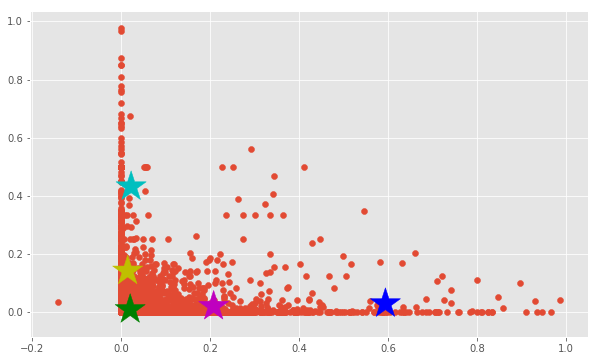

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [15]:
# Initializing KMeans
kmeans = KMeans(n_clusters=5)

# Fitting with inputs
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

# Getting the cluster centers
C = kmeans.cluster_centers_
fig = plt.figure()

# Setting colors for centroids
colors = ['g', 'b', 'y', 'c', 'm']

# Plotting the graph with calculated centroids
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000)
plt.show()

print(kmeans)

The output results indicate clusters that are associated with COGSPercent and DeletionPercent values. The values range from 0% to 100% on 0.0 ~ 1.0 scale.

Maroon - cluster that is associated with very high deletion percent.
Yellow - cluster that is associated with high deletion percent.
Green - cluster that is associated wiht low Deletion percent and low COGS percent.
Blue - cluster that is associated with high COGS percent.
Sky Blue - cluster that is associated with very high COGS Percent.

With such outcome, besides green centroid, Service Express will look into other clusters, which affect their current and future revenues. One way to do so is looking at which type of revenue Service Express made that led to high COGS or Deletion. For example, one of the columns in the data has 'VMAXRevenue', a device that requires a quite a lot of money to fix. Line 2 shows that the customer who got their VMAX device insured had high COGS. Therefore, Service Express will try to increase the amount they charge for VMAX device, when they make a contract next time. 


This is still a rough version. However, after consulting, more details will be provided. Moreover, one thing I am interested in is using Topic Modeling algorithm to figure out why certain customers have high deletion percentage.